# Image Classification

In [15]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

In [30]:
df = pd.read_csv('datasets/fashion-mnist_train.csv')

df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
df.shape

(60000, 785)

In [32]:
LOOKUP = {0: 'T-shirt',
          1: 'Trouser',
          2: 'Pullover',
          3: 'Dress',
          4: 'Coat',
          5: 'Sandal',
          6: 'Shirt',
          7: 'Sneaker',
          8: 'Bag',
          9: 'Ankle boot'}

In [33]:
def display_image(features, actual_label):
    print('Actual Label: ', LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [34]:
def summarize_classification(y_test, y_pred, avg_method='weighted'):

    accuracy = accuracy_score(y_test, y_pred, normalize=True)
    num_acc = accuracy_score(y_test, y_pred, normalize=False)

    precision = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)

    print('Test data count: ', len(y_test))
    print('accuracy: ', accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('accuracy_count: ', num_acc)
    print()

In [35]:
#df = df.sample(frac=0.3).reset_index(drop=True)

X = df.drop('label', axis=1)
Y = df['label']

X = X/255.

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

Actual Label:  Coat


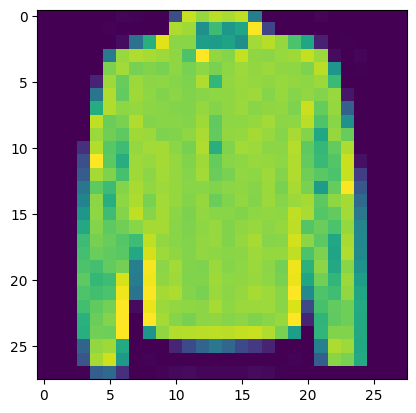

In [36]:
display_image(X.loc[8].values, Y.loc[8])

In [37]:
log_reg_model = LogisticRegression(solver='sag', multi_class='auto', max_iter=10000).fit(x_train, y_train)

In [38]:
y_pred = log_reg_model.predict(x_test)

summarize_classification(y_test, y_pred)

Test data count:  12000
accuracy:  0.8506666666666667
precision:  0.849408370242585
recall:  0.8506666666666667
accuracy_count:  10208

